# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [8]:
using Clustering, CSV, DataFrames

## 讀取資料

In [2]:
data = CSV.read("s1-set.csv")

5000×2 DataFrame
│ Row  │ x      │ y      │
│      │ Int64  │ Int64  │
├──────┼────────┼────────┤
│ 1    │ 664159 │ 550946 │
│ 2    │ 665845 │ 557965 │
│ 3    │ 597173 │ 575538 │
│ 4    │ 618600 │ 551446 │
│ 5    │ 635690 │ 608046 │
│ 6    │ 588100 │ 557588 │
│ 7    │ 582015 │ 546191 │
│ 8    │ 604678 │ 574577 │
│ 9    │ 572029 │ 518313 │
│ 10   │ 604737 │ 574591 │
⋮
│ 4990 │ 681053 │ 892766 │
│ 4991 │ 683321 │ 873932 │
│ 4992 │ 701017 │ 931252 │
│ 4993 │ 645677 │ 814395 │
│ 4994 │ 677362 │ 853471 │
│ 4995 │ 659046 │ 930099 │
│ 4996 │ 665426 │ 853940 │
│ 4997 │ 691827 │ 863963 │
│ 4998 │ 650661 │ 861267 │
│ 4999 │ 599647 │ 858702 │
│ 5000 │ 684091 │ 842566 │

In [3]:
X = Matrix(data[:, 1:2])'

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

In [4]:
k = 15
result = kmeans(X, k)

KmeansResult{Array{Float64,2},Float64,Int64}([398870.0484330484 735913.281553398 … 801616.7816455696 230846.07692307694; 404924.06552706554 809252.6779935275 … 321123.3417721519 836407.113122172], [7, 7, 7, 7, 7, 7, 7, 7, 7, 7  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [3.868603093541992e9, 3.784863740838379e9, 8.956930531298828e7, 6.740235058618164e8, 1.976029744717041e9, 6.258253758146973e8, 1.402054662494873e9, 3.6132858852539062e6, 4.345366158831543e9, 3.3965333364257812e6  …  6.949362774208984e9, 1.6101585036292969e10, 8.169029984202148e9, 5.383512572613281e9, 2.0512412515901367e10, 6.9654136088984375e9, 4.936819555257324e9, 9.973441203853027e9, 2.101373493528955e10, 3.795326288506836e9], [351, 618, 339, 125, 685, 120, 297, 317, 346, 336, 399, 202, 328, 316, 221], [351, 618, 339, 125, 685, 120, 297, 317, 346, 336, 399, 202, 328, 316, 221], 2.0906734162010273e13, 50, true)

In [5]:
data[!, :cluster] = string.(assignments(result));

In [10]:
using Gadfly

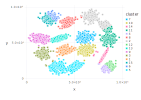

In [11]:
plot(data, x="x", y="y", color="cluster", Geom.point)